<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [8]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [10]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [11]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [12]:
import yfinance as yf

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# You can now use this ticker object to extract data on Tesla
# Get historical stock data for Tesla
historical_data = tesla_ticker.history(period="1mo")
print(historical_data)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2024-02-09  190.179993  194.119995  189.479996  193.570007   84476300   
2024-02-12  192.110001  194.729996  187.279999  188.130005   95498600   
2024-02-13  183.990005  187.259995  182.110001  184.020004   86759500   
2024-02-14  185.300003  188.889999  183.350006  188.710007   81203000   
2024-02-15  189.160004  200.880005  188.860001  200.449997  120831800   
2024-02-16  202.059998  203.169998  197.399994  199.949997  111173600   
2024-02-20  196.130005  198.600006  189.130005  193.759995  104545800   
2024-02-21  193.360001  199.440002  191.949997  194.770004  103844000   
2024-02-22  194.000000  198.320007  191.360001  197.410004   92739500   
2024-02-23  195.309998  197.570007  191.500000  191.970001   78841900   
2024-02-26  192.289993  201.779999  192.000000  199.399994  111747100   
2024-02-27  204.039993  205.600006  198.259995  199

# Get historical stock data for Tesla
historical_data = tesla_ticker.history(period="1mo")
print(historical_data)
Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [13]:
import yfinance as yf

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for Tesla with period set to "max"
tesla_data = tesla_ticker.history(period="max")

# Display the Tesla data DataFrame
print(tesla_data)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2024-03-04  198.729996  199.750000  186.720001  188.139999  134334900   
2024-03-05  183.050003  184.589996  177.570007  180.740005  119660800   
2024-03-06  179.990005  181.580002  173.699997  176.539993  107920900   
2024-03-07  174.350006  180.039993  173.699997  178.649994  102129000   
2024-03-08  181.500000  182.729996  174.699997  175.339996   85315300   

            Dividends  Stock Splits  
Date        

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [14]:
import yfinance as yf

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for Tesla with period set to "max"
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [15]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("HTML data downloaded successfully.")
else:
    print("Failed to download HTML data. Status code:", response.status_code)


HTML data downloaded successfully.


Parse the html data using `beautiful_soup`.


In [16]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can find elements, extract text, etc.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [17]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing Tesla Revenue
table = soup.find_all('table')[0]

# Convert the table into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Display the DataFrame
print(tesla_revenue)


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [19]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
# Display the last 5 rows of the tesla_revenue DataFrame using the tail function
print(tesla_revenue.tail(5))


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [22]:
import yfinance as yf

# Create a ticker object for GameStop with ticker symbol GME
gme_ticker = yf.Ticker("GME")




Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [23]:
# Extract stock information for GameStop with the period parameter set to max
gme_data = gme_ticker.history(period="max")

# Display the DataFrame
print(gme_data)


                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620128   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2024-03-04  14.930000  15.590000  14.830000  15.220000   4367600        0.0   
2024-03-05  14.950000  15.280000  14.780000  15.000000   3152700        0.0   
2024-03-06  15.220000  15.890000  14.940000  15.260000   3818100        0.0   
2024-03-07  15.260000  15.510000  15.050000  15.260000   2111900        0.0   
2024-03-08  15.400000  15.630000  14.520000  14.6500

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [24]:
import yfinance as yf

# Create a ticker object for GameStop with ticker symbol GME
gme_ticker = yf.Ticker("GME")

# Extract stock information for GameStop with the period parameter set to max
gme_data = gme_ticker.history(period="max")

# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [25]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("HTML data downloaded successfully.")
else:
    print("Failed to download HTML data. Status code:", response.status_code)


HTML data downloaded successfully.


Parse the html data using `beautiful_soup`.


In [27]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can find elements, extract text, etc.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [28]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing GameStop Revenue
table = soup.find_all('table')[1]  # Assuming GameStop Revenue table is the second table in the HTML

# Convert the table into a DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

# Display the DataFrame
print(gme_revenue)


          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
# Display the last five rows of the gme_revenue DataFrame using the tail function
print(gme_revenue.tail(5))


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


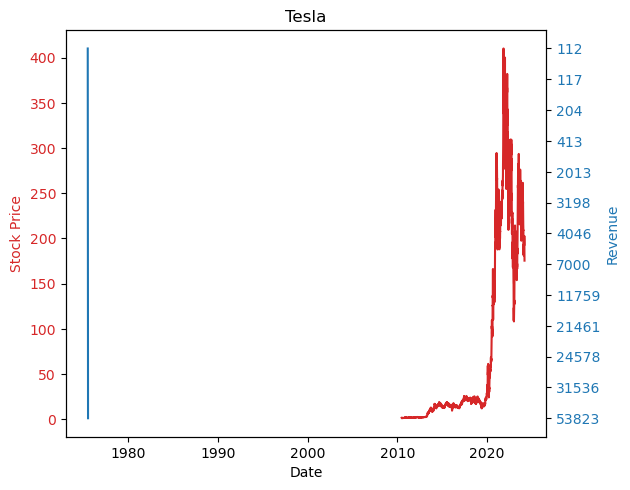

In [30]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Revenue', color=color)  
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.title(title)
    plt.show()

# Call make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


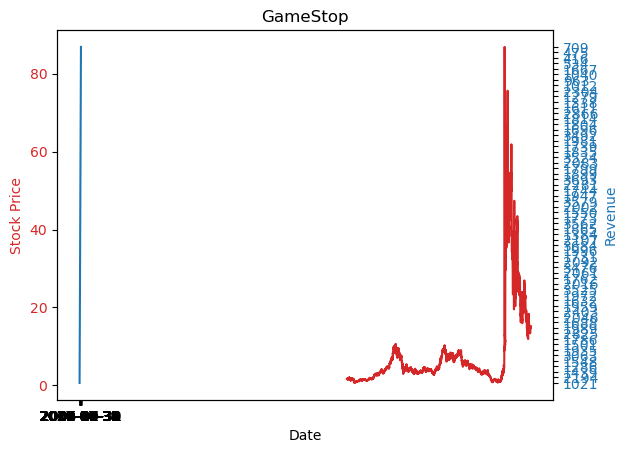

In [31]:
# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    import matplotlib.pyplot as plt
    
    # Create subplots
    fig, ax1 = plt.subplots()

    # Plot stock data on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for revenue data
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Revenue', color=color)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set the title
    plt.title(title)

    # Display the graph
    plt.show()

# Call the make_graph function with GameStop data and revenue data
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
